## **REPASO: MANEJO DE ARCHIVOS Y EXPRESIONES DE COMPRESION**

### **Expresiones de compresion**

> Es una forma corta y elegante de crear estructuras (listas, conjuntos, diccionarios) usando un for dentro de una sola línea.

In [ ]:
print('*' * 16) #Meramente estetico

numeros = []
for i in range(1, 6):
    numeros.append(i * 2)
print(numeros)

# vs
print('*' * 16) #Meramente estetico

numeros = [i * 2 for i in range(1, 6)]
print(numeros)

print('*' * 16) #Meramente estetico

# Diccionario de letras con su valor ASCII
ascii_dict = {c: ord(c) for c in "ABCD"}
print(ascii_dict)

**Diferencia entre esto y una fucnion lambda**

| **Comprensión**                                                           | **Lambda**                                                  |
| ------------------------------------------------------------------------- | ----------------------------------------------------------- |
| Se usa para **crear listas, diccionarios o conjuntos** en una sola línea. | Se usa para **crear funciones pequeñas** en una sola línea. |
| Es una forma "corta" de escribir un bucle `for` dentro de una estructura. | Es una forma "corta" de definir funciones sin `def`.        |
| Ejemplo: `[x*2 for x in range(5)]` → lista de valores.                    | Ejemplo: `lambda x: x*2` → función que multiplica por 2.    |


In [ ]:
#Ejecucion practica

ej1 = lambda x: x*2

ej2 = [x*2 for x in range(5)]

print('-' * 120) #Meramente estetico

print('Este es el resultado de una funcion lambda: ',ej1(5), ' y este es el resultado de una expresion con compresion: ',ej2)

**PERSISTENCIA DE DATOS.**

El manejo de archivos significa que un programa puede guardar información en un archivo o leerla después.

* Eso permite que los datos no se pierdan cuando cierras el programa (a diferencia de las variables, que desaparecen al terminar la ejecución).

**Comenzamos en este tema por algo sencillo...**

La función open(), esta la usamos en python para abrir un archivo, ejemplo de sintaxis:

    nombre_archivo = open("nombre.txt", "modo")

Ahora, existen parametros a tomar en cuenta al momento de manejar archivos en python.

> **Nombre del archivo** → "nombre.txt"

* Si está en la misma carpeta que tu script, basta con el nombre.

* Si está en otra carpeta, deben colocar la ruta:

    "C:/Usuarios/TuNombre/Documentos/archivo.txt"


**Modo de apertura:**

* "r" → leer (read). Si el archivo no existe, nos da error.

* "w" → escribir (write). Si el archivo ya existe, borra todo y escribe desde cero.

* "a" → agregar (append). No borra lo anterior, solo añade al final.

* "x" → crear. Da error si el archivo ya existe.

* "r+" → leer y escribir al mismo tiempo.

* "w+" → escribir y leer, pero borra todo al abrir.

* "a+" → leer y agregar (sin borrar).

**IMPORTANTE:** Cada vez que abrimos un archivo debemos cerrarlo usando la funcion .close()

**EJEMPLOS**

In [ ]:
with open("datos.txt", "w") as archivo:
    archivo.write("Primera línea\n")
    archivo.write("Segunda línea\n")

#Aqui lo que sucede es que si el archivo esta en blanco se escribe lo indicado pero si ya tiene texto este contenido se sobreescribe debido a que lo abrimos en modo W.

Ahora? Si el archivo tiene contenido y solo queremos agregarle mas? como se hace?

Para ello usamos el modo de apertura 'a' que es para agregar.

In [ ]:
with open("datos.txt", "a") as archivo:
    archivo.write("Tercera línea (añadida de ultimo)\n")

**Y si queremos agregar texto al inicio como se hace?**

En este caso Python no puede abrir un archivo y escribir al principio sin más, porque los archivos se escriben de forma secuencial. Lo que se hace en este caso es:

* Leer todo el archivo.
* Guardar el nuevo texto + lo anterior.
* Volver a escribir todo.

In [ ]:
with open("datos.txt", "r") as archivo:
    contenido = archivo.read()

with open("datos.txt", "w") as archivo:
    archivo.write("Texto nuevo al inicio\n" + contenido)

COMO USARLO EN GOOGLE COLABS?

In [ ]:
from docx import Document
from google.colab import files

# Crear un documento nuevo
doc = Document()
doc.add_heading("Documento creado en Google Colab", level=1)
doc.add_paragraph("Hola! Este es un párrafo dentro de mi archivo Word.")

# Guardarlo en la carpeta actual de Colab
doc.save("mi_doc.docx")
print("Archivo Word creado correctamente.")


files.download("mi_doc.docx")


## **REPASO: TIPOS DE ARCHIVOS Y COMO PUEDO MANEJARLOS, CON QUE O QUE?**

### **TXT**

* Son los más simples.
* Se leen y escriben con open().
* Ideales para listas, notas, registros, logs, etc.

### **PDF**

No se leen como texto plano.

**Necesitaran usar librerías como:**

* PyPDF2 → para leer y extraer texto.

* reportlab → para crear PDFs.

In [ ]:
import PyPDF2

with open("documento.pdf", "rb") as archivo:
    lector = PyPDF2.PdfReader(archivo)
    pagina = lector.pages[0]
    print(pagina.extract_text())


### **Word (Doc / Docx)**

* No se leen con open().
* Se usa la librería python-docx.

In [ ]:
from docx import Document

doc = Document("documento.docx")
for parrafo in doc.paragraphs:
    print(parrafo.text)

Resumen de metodos basicos importantes para el manejo de archivos con python-docx

| Método / Atributo                   | ¿Qué hace?                                                 | Ejemplo de uso                                               |
| ----------------------------------- | ---------------------------------------------------------- | ------------------------------------------------------------ |
| `Document()`                        | Crea un documento nuevo o abre uno existente               | `doc = Document("mi.docx")`                                  |
| `doc.paragraphs`                    | Devuelve una lista de párrafos del documento               | `for p in doc.paragraphs: print(p.text)`                     |
| `.add_paragraph("texto")`           | Agrega un párrafo **al final** del documento               | `doc.add_paragraph("Hola mundo")`                            |
| `.add_heading("texto", level=N)`    | Agrega un título (nivel 0–9)                               | `doc.add_heading("Título", level=1)`                         |
| `.add_page_break()`                 | Inserta un salto de página                                 | `doc.add_page_break()`                                       |
| `.save("archivo.docx")`             | Guarda el documento en disco                               | `doc.save("nuevo.docx")`                                     |
| `.tables`                           | Devuelve una lista de tablas del documento                 | `for t in doc.tables: ...`                                   |
| `.add_table(rows, cols)`            | Inserta una tabla vacía                                    | `table = doc.add_table(2, 2)`                                |
| `.runs`                             | Fragmentos de texto dentro de un párrafo (permite estilos) | `p.runs[0].bold = True`                                      |
| `.insert_paragraph_before("texto")` | Inserta un párrafo **antes** del actual                    | `doc.paragraphs[0].insert_paragraph_before("Texto inicial")` |


### **Excel (.xls / .xlsx)**

* Tampoco se manejan con open().

**Se usan librerías como:**

* openpyxl (muy usada).

* pandas (para análisis de datos, más potente).

In [ ]:
from openpyxl import load_workbook

wb = load_workbook("datos.xlsx")
hoja = wb.active
for fila in hoja.iter_rows(values_only=True):
    print(fila)

| Método / Atributo               | ¿Qué hace?                          | Ejemplo de uso                                              |
| ------------------------------- | ----------------------------------- | ----------------------------------------------------------- |
| `Workbook()`                    | Crea un archivo Excel nuevo         | `wb = Workbook()`                                           |
| `load_workbook("archivo.xlsx")` | Abre un archivo Excel existente     | `wb = load_workbook("datos.xlsx")`                          |
| `wb.active`                     | Devuelve la hoja activa             | `hoja = wb.active`                                          |
| `.create_sheet("Nombre")`       | Crea una nueva hoja                 | `wb.create_sheet("Hoja2")`                                  |
| `.sheetnames`                   | Lista los nombres de hojas          | `print(wb.sheetnames)`                                      |
| `.cell(row, column)`            | Accede a una celda                  | `hoja.cell(1, 1).value = "Hola"`                            |
| `.append([lista])`              | Agrega una fila al final con datos  | `hoja.append(["Nombre", "Edad"])`                           |
| `.iter_rows(values_only=True)`  | Itera filas completas               | `for fila in hoja.iter_rows(values_only=True): print(fila)` |
| `.insert_rows(idx)`             | Inserta filas antes del índice dado | `hoja.insert_rows(1)`                                       |
| `.delete_rows(idx)`             | Borra una fila                      | `hoja.delete_rows(2)`                                       |
| `.save("archivo.xlsx")`         | Guarda los cambios en el Excel      | `wb.save("nuevo.xlsx")`                                     |




---





---



## **Tema 1 - EL MODULO**

* Es un archivo de script de funciones, variables o clases de Python.
* Python tiene muchos módulos desarrollados por numerosos desarrolladores.
* Al importar el módulo creado, escriba el nombre del módulo con 'import'.
* Cuando lo utilice, marque un punto (.) en el nombre del módulo como se muestra a continuación y escriba componentes en el campo.

        import [nombre del módulo].[nombre de la clase].[nombre del método].


Existen más de 100 bibliotecas estándar, incluidos módulos para el tratamiento de cadenas y texto, tratamiento de datos binarios, fecha, hora y ordenación, operaciones numéricas y módulos de funciones matemáticas, acceso a archivos y directorios, módulos para el acceso a bases de datos del sistema Unix, compresión de datos y módulos gráficos.

In [ ]:
import datetime

datetime.datetime.now() #Imprimimos la hora actual



---



**Podemos importar modulos con un alias usando as**

In [ ]:
import datetime as dt # utilizar dt en lugar de datetime a partir de ahora

start_time = dt.datetime.now()
start_time.replace(month = 12, day = 25)

### **Sentencia from ___ import ____**

* La sentencia from~import es un método para escoger lo que necesitas dentro de un módulo y traerlo.
* Es la forma de

       "from [nombre del módulo] import [nombre de la clase].[nombre del método].

* En el módulo datetime, sólo se incluye la clase datetime.
* Si escribe una sentencia from, puede omitir el [nombre del módulo] que tuvo que escribir en la sentencia import.

In [ ]:
from datetime import datetime
start_time = datetime.now()
start_time.replace(month = 12, day = 25)

### **Otra Forma de importar todo usando ' * '**

* "from [nombre del módulo] import *" significa traer todas las variables, funciones y clases del módulo.
> **' * '** --> significa todo.
* El código de abajo trae todas las clases a un módulo llamado datetime.
* Entre ellos, la fecha de hoy se imprime utilizando today de dateclass (método que devuelve la fecha de hoy).

In [ ]:
from datetime import *
today = date. today()
today



---



### **Funcion dir**

La función dir devuelve todas las listas de clases y atributos disponibles en el módulo datetime.
* MAXYEAR es el año máximo que puede expresar el objeto datetime y tiene un valor de 9999.
* MINYEAR tiene un valor de 1.

Clases como date, datetime, datetime CAPI, time, timedelta, timezone y tzinfo tienen la función de utilizar convenientemente la información de fecha, hora, zona horaria y huso horario.

In [ ]:
print(dir(datetime))

In [ ]:
import os
print(dir(os))

##**Tema 2 - LA FUNCION**


* Una función es un conjunto de códigos que realiza una operación específica dentro de un programa.
* Tiene la característica de ejecutarse cuando es llamada.
* Una función es el componente básico de un programa.
El software que utilizamos está hecho combinando varias funciones y módulos.

**SINTAXIS DE UNA FUNCION**

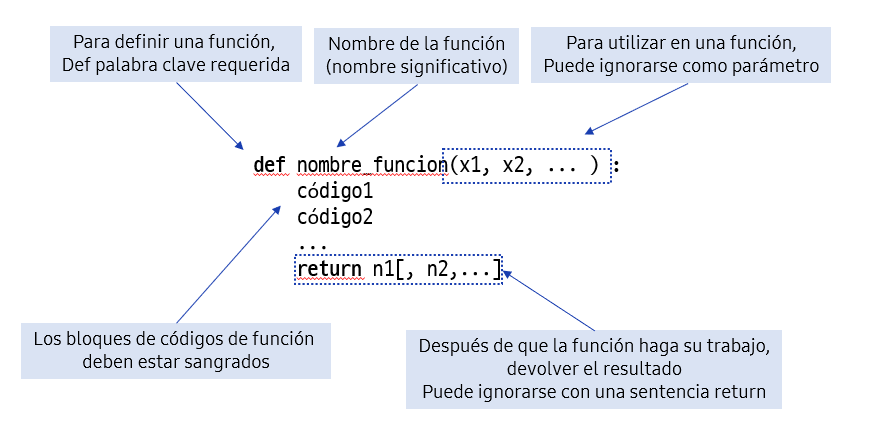


> Las funciones dentro de sus componentes tienen 2 terminos claves que como profesionales debemos manejar y diferenciar

**Parámetro:** Es una variable definida en la cabecera de la función o del método. Recibe el valor real cuando se llama a la función.

**m y n de:**

    def funcion(m, n):

**Argumento:** Se refiere al valor real que se pasa cuando se llama a una función o método. Se enomina simplemente argumento.

**3 y 4 de:**

    def funcion2(3, 4)

**Ejemplo sencillo**

In [ ]:
#EJEMPLO SENCILLO
def print_star():
  print('****')

print_star()

**Ejemplo sencillo 2**

In [ ]:
#Hagamos una funcion de suma usando funciones, paramtros y argumentos

def obtener_suma(inicio,fin):
  sumador=0
  for i in range(inicio,fin+1):
    sumador += i
  return sumador

In [ ]:
x=obtener_suma(1,10)
print(x)

**Otro ejemplo sencillo mas**

In [ ]:
def imprimir_hola(cant):
  print('Hola ' * cant)

#Llamada a la funcion
print('Prueba de impresion: ')
imprimir_hola(2)

print('\nPrueba de impresion: ')
imprimir_hola(6)



### **Paso arbitrario de argumentos**

* Cuando se utiliza una función, hay casos en los que no se determina el número de argumentos. Esto se denomina argumento arbitrario.
* Cuando reciba un argumento arbitrario de una función, ponga un asterisco (*) delante del parámetro.
* Una variable dentro de una función que recibe un argumento arbitrario es un parámetro arbitrario.
Se pueden utilizar parámetros arbitrarios en sentencias for - in, como tuplas y listas.

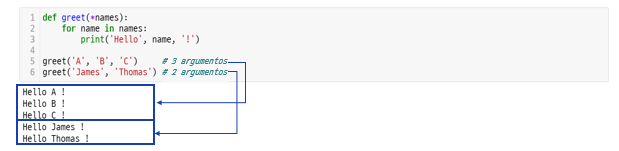

In [ ]:
#Ejercicio . Hallar la suma de numeros enteros usando argumentos arbitrarios

#...

####**Ademas de esto podemos llamar a una funcion sin argumentos**

Para asignar una tarea específica a una función, es necesario introducir el argumento correcto. A veces, sin embargo, es conveniente utilizar el valor por defecto para evitar el error y trabajar de forma mas flexible.

* En este caso, se utiliza el parametro por defecto.
* Como se muestra en el código siguiente, puede asignar un valor por defecto como = 1 a un parámetro.



In [ ]:
def print_star(n = 1):
  for _ in range(n):
    print("********")

print_star() # Ejecutar sin error aunque no haya argumento

> Incluso si se llama sin argumento, el valor por defecto de 1 se pasa al parámetro n. Por lo tanto, normalmente sale una sola linea de asterisco.

**Metodo posicional de argumentos**

Es el orden en que se enumeran los argumentos importantes .

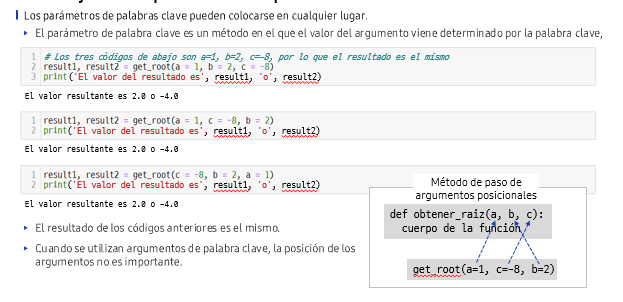

In [ ]:
import math

def calcular_potencia(x,y):
  resul = math.pow(x,y)
  return resul

resultado1 = calcular_potencia(5,2)
resultado2 = calcular_potencia(2,5)

print(resultado1)
print(resultado2)

###**DEVOLUCION - RETURN**

Devuelve el resultado a la función get_sum que devuelve la suma de dos valores Pongamos la suma de dos números a y b en la variable resultado y devolvamos este resultado mediante la sentencia
return.

n1 devuelve 30, la suma de 10 y 20, y n2 devuelve 300, la suma de 100 y 200.

In [ ]:
def get_sum(a, b):
  result = a + b
  return result

n1 = get_sum(10, 20)
print('La suma de 10 y 20 =', n1)

n2 = get_sum(100, 200)
print('La suma de 100 y 200 =', n2)

In [ ]:
def get_root(a, b, c):
  r1 = (-b + (b ** 2 - 4 * a * c) ** 0.5) / (2 * a)
  r2 = (-b - (b ** 2 - 4 * a * c) ** 0.5) / (2 * a)
  return r1, r2

result1, result2 = get_root(1, 2, -8)
print('El valor del resultado es',result1,'y', result2,'!')

### **FUNCIONES RECURSIVAS**

Una función recursiva es una función que se llama a sí misma dentro de su propio código para resolver un problema.
* La idea principal es dividir un problema grande en subproblemas más pequeños, hasta llegar a un caso simple que se puede resolver directamente (llamado caso base).

      def nombre_funcion(parametros):
          if condicion_base:              # Caso base → el que detiene la recursión
              return resultado_simple
          else:
              return nombre_funcion(nuevo_valor)   # Hace la llamada recursiva


In [ ]:
"""
Ejemplo 2: Números de Fibonacci

#La serie de Fibonacci: 0, 1, 1, 2, 3, 5, 8, ...
donde cada número es la suma de los dos anteriores.
"""
def fibonacci(n):        #definimos la funcion e indicamos que debe recibir un argumento 'n'
    if n == 0:           # Caso base 1
        return 0
    elif n == 1:         # Caso base 2
        return 1
    else:                # Caso recursivo
        return fibonacci(n-1) + fibonacci(n-2)

print(fibonacci(6))

Un ejemplo mas sacado de las matematicas

In [ ]:
print("EJEMPLO CONTAR ATRÁS")
print("=" * 20) # estetico

def contar_atras(numero):
    print(numero)  # Imprime el número actual

    if numero > 1:  # Si no hemos llegado a 1
        contar_atras(numero - 1)  # Se llama a sí misma y cuando llegue a 1, se detiene automáticamente

print("Contando:")
contar_atras(10)

print("\n")

In [ ]:
empleados = {
    "Ana (Gerente)": ["Luis (Ventas)", "María (Marketing)"],
    "Luis (Ventas)": ["Pedro (Asistente)", "Sofía (Asistente)"],
    "María (Marketing)": ["Maritza (Asistente)"],
    "Pedro (Asistente)": [],
    "Sofía (Asistente)": [],
    "Maritza (Asistente)": []
}

def mostrar_arbol(jefe, nivel=0):
    print("   " * nivel + "- " + jefe)
    for empleado in empleados[jefe]:
        mostrar_arbol(empleado, nivel + 1)  # Llamada recursiva para cada hijo

mostrar_arbol("Ana (Gerente)")


Ejemplo con un **Grafo**

* Es un diagrama visual con puntos y líneas para modelar relaciones complejas, usado en informática, matemáticas, y ciencias sociales para analizar interacciones y conexiones entre elementos

In [ ]:
grafo = {
    "A": ["B", "C"],
    "B": ["D", "E"],
    "C": ["F"],
    "D": [],
    "E": ["F"],
    "F": []
}

def recorrer_grafo(nodo, visitados=None):
    if visitados is None:
        visitados = set()

    if nodo in visitados:  # Evitar ciclos infinitos
        return

    print(nodo)
    visitados.add(nodo)

    for vecino in grafo[nodo]:
        recorrer_grafo(vecino, visitados)  # Llamada recursiva

recorrer_grafo("A")


### **Memorizacion en funciones recursivas**

**Qué es la memorización en funciones recursivas?**

La memorización (memoization) es una técnica de optimización que consiste en guardar los resultados de llamadas anteriores a una función recursiva en una estructura auxiliar (por ejemplo, un diccionario).
De esta forma, cuando la función recibe un parámetro que ya fue calculado, no vuelve a hacer toda la recursión, sino que devuelve el resultado directamente desde la memoria.

🔹 Ventajas

**Eficiencia:** evita repetir cálculos costosos.

**Rapidez:** convierte algoritmos que eran exponenciales en casi lineales (ejemplo típico: Fibonacci).

**Simplicidad:** se mantiene la claridad de la recursión, pero con mejor rendimiento.

🔹 Desventajas

**Uso de memoria extra:** se necesita espacio adicional para guardar los resultados.

**No siempre es útil:** si el problema no recalcula los mismos valores, la memorización no mejora nada.

**Sobrecarga:** manejar estructuras extra puede hacer que sea menos eficiente en problemas muy simples

In [ ]:
# Ejemplo a desarrollar ...

###**¿Qué son los conjuntos (set) en Python?**

Un conjunto (set) en Python es una colección desordenada y sin elementos repetidos.

* Desordenado → no tienen un índice fijo como las listas.

* Único → no permite duplicados (si agregas el mismo elemento varias veces, solo queda uno).

* Mutables → puedes modificarlos (agregar o eliminar elementos).



**Utilidad de los conjuntos**

Los set son útiles cuando necesitamos:

* Eliminar duplicados automáticamente.

* Realizar operaciones matemáticas de conjuntos: unión, intersección, diferencia, diferencia simétrica.

* Comprobar pertenencia rápidamente (in es mucho más rápido en un set que en una lista).

* Trabajar con datos únicos (ej. correos registrados, IDs únicos, etc.).

In [ ]:
#Ejemplo a desarrollar ...

#conjunto vacio
v1 = set()
print(v1)

#agregar elementos
v1.add(5)
v1.add(8)

print(v1)

#eliminar elementos
v1.remove(5)
print(v1)

#verificar pertenencia de un dato
print(5 in v1)

## **Tema 3 - FUNCION LAMBDA**

> Una función lambda es una pequeña subrutina o expresión de código que puede definirse de forma anónima (sin nombre) y que se ejecuta en línea, a menudo como un argumento para otras funciones de orden superior o para tareas sencillas que se realizan una sola vez.

> A diferencia de las funciones tradicionales, no necesitan una declaración return y son ideales para escribir código más conciso y eficiente en lenguajes de programación funcional.

In [ ]:
print('suma de 100 y 200 :', (lambda x,y : x+y)(100,200))

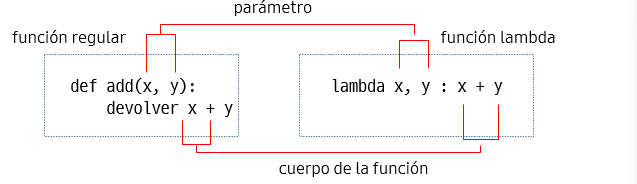

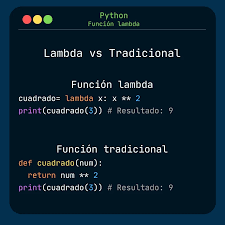

### **Funcion de Filtrado**

La función filtro recibe elementos iterables y devuelve sólo los que son True en un paquete.


Sintaxis:

    filter((To_be_applied function, {objeto iterable})

**Ejemplo:**

In [ ]:
# Devuelve True para valores superiores a 19, y False para los que no lo son.
def adult_function(n):
  if n >= 18:
    return True
  else:
    return False

edades = [34, 39, 20, 18, 13, 54, 10, 3]
print('lista de adultos :')

for i in filter(adult_function, edades): # filtra las edades utilizando la función filter ()
  print(i, end = ' ')

### **Funcion de mapa**

**¿Qué es map()?**

map() es una función de orden superior en Python que permite aplicar una función a cada elemento de un iterable (como listas, tuplas o conjuntos) sin necesidad de usar un bucle explícito.

Ok.. pero que hace en realidad?:

1. Toma una función.

2. La aplica a cada elemento de un iterable.

3. Devuelve un objeto tipo map (que se puede convertir en lista, tupla, etc.).

---
**¿Para qué sirve?**

* Para transformar datos de forma rápida y elegante.

* Para evitar bucles for innecesarios.

* Para aplicar funciones ya existentes (como str, int, etc.) a todos los elementos.

* Muy útil en procesamiento de listas y datos.

**Sintaxis**

    map(funcion, iterable)


**funcion** → la función que se aplicará.

**iterable** → colección de datos (lista, tupla, set, etc.).

---

**NOTA: Esta devuelve un objeto map, que normalmente se convierte a list o tuple.**

In [ ]:
a = [1, 2, 3, 4, 5, 6, 7]
# aplicar el valor de retorno de la función cuadrada a cada término de a

salida = list(map(lambda x : x**2, a))
print(salida)

In [ ]:
# Y si usamos labda aqui ... ?

### **Funcion de Reduce**

**La función reduce está incluida en el módulo functools.**

Se usa para reducir (o acumular) una lista de valores a un único resultado, aplicando de manera sucesiva una función binaria (que recibe dos argumentos).

**Su estructura es:**

    from functools import reduce
    reduce(funcion, iterable[, valor_inicial])


funcion → función que recibe dos parámetros y devuelve un resultado.

iterable → lista, tupla o conjunto sobre el que trabajar.

valor_inicial (opcional) → valor inicial del acumulador.

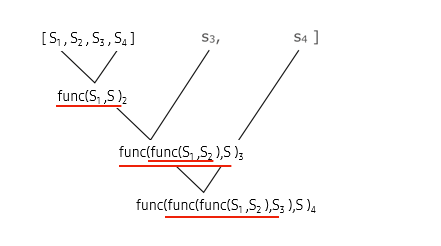

In [ ]:
from functools import reduce

numeros = [1, 2, 3, 4, 5]

def sumar(a, b):
    return a + b

resultado = reduce(sumar, numeros)
print(resultado)

**Proceso interno:**

1. sumar(1, 2) → 3

2. sumar(3, 3) → 6

3. sumar(6, 4) → 10

4. sumar(10, 5) → 15

## **Tema 4 - Gestion de excepciones**

Un programador debe codificar en previsión de excepciones. Un código a continuación está en peligro de terminación debido a una entrada incorrecta. Encierre el codigo con la sentencia try - except.


In [ ]:
try:
  a, b = input ("Introduzca dos numeros : ").split()
  result = int(a) / int(b)
  print('{}/{} = {}'.format(a, b, result))
except :
  print ('Comprueba si los numeros son correctos.')

### **Que tipos de errores existen?**

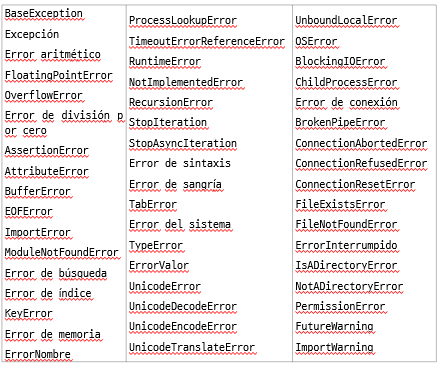

**Como examino el tipo de error?**

In [ ]:
try:
  b = 2 / 0
  a = 1 + "hundred"
except Exception as e:
  print('error :', e) # con 'e' conocemos o traemos cual es el error generado

In [ ]:
from logging import exception

try:
  num1 = int(input("Ingresar numero uno: "))
  num2 = int(input("Ingresar numero dos: "))
  resultado = num1 / num2
  print("El resultado es:", resultado)

except ValueError:
  print("Usted debe agregar unicamente numeros enteros!")

except ZeroDivisionError:
  print("No se puede dividir por cero!")

except Exception as e:
  print("El error que usted tiene es de tipo: ", e)


## **Tema 5 - Iteradores en Python**

Un iterador es un objeto que permite recorrer una secuencia de datos (como listas, tuplas o strings) elemento por elemento, sin necesidad de usar índices.

> En Python, cualquier objeto que se pueda recorrer se llama iterable (ejemplo: listas, cadenas, diccionarios).

* Para recorrerlo paso a paso necesitamos convertirlo en iterador con la función iter().

**Función iter()**
Convierte un iterable (lista, tupla, string, etc.) en un iterador.

Sintaxis:

    iterador = iter(iterable)



In [ ]:
#Ejemplo:

iter_1 = iter([10, 20, 30])
print(iter_1)

**Función next()**

1. Toma un iterador y devuelve el siguiente elemento.

2. Cada vez que llamamos a next(), avanza al siguiente valor.

3. Si ya no hay más elementos, lanza un error StopIteration.


In [ ]:
iterador = iter([10, 20, 30])

print(next(iterador))
print(next(iterador))
print(next(iterador))
print(next(iterador))


In [ ]:
nombres = ["Ana", "Luis", "Pedro"]
it = iter(nombres)

print(next(it))
print(next(it))
print(next(it))

nombres.append("Juan")
print(next(it))

**En resumen:**
* iter() convierte un iterable en un iterador.

* next() permite recorrer el iterador paso a paso hasta agotarlo.



---



| Método          | Carga todo en memoria | Control paso a paso | Adecuado para datos infinitos | Uso común                           |
| --------------- | --------------------- | ------------------- | ----------------------------- | ----------------------------------- |
| **Lista + for** | ✅ Sí                  | ❌ No                | ❌ No                          | Programación básica                 |
| **Lambda/map**  | ✅ Sí                  | ❌ No                | ❌ No                          | Transformación rápida               |
| **Iter/next**   | ❌ No (trae de a poco) | ✅ Sí                | ✅ Sí                          | Big data, streams, archivos grandes |




---



In [ ]:
it = iter([10, 20, 30, 40])
print(next(it))  # 10
print(next(it))  # 20

print('+++++++++++++')
print(5+7)
hola='1'
print(hola)
print(5+8)
print('+++++++++++++')

# más adelante en el programa
print(next(it))  # 30
print(next(it))  # 40


In [ ]:
with open("archivo.txt") as f:
    it = iter(f)       # el archivo es iterable
    print(next(it))    # trae solo la primera línea
    print(next(it))    # trae la segunda línea


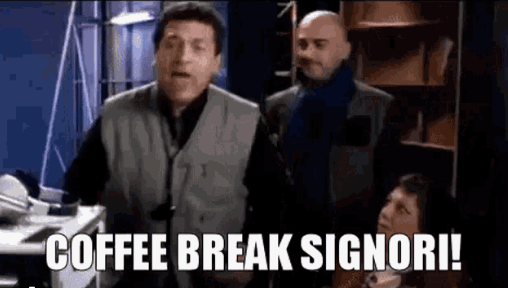

## **Tema 6: Variables locales vs globales y Funciones Anidadas**

Python distingue el ámbito de las variables de la siguiente manera.

* L(Local) : una variable local definida dentro de una función
* E(Enclosing Function Local): ambito de una funcion que contiene a otra función.
.

Python, a diferencia de otros lenguajes de programacion, puede definir una funcion dentro de otra funcion. (función interna).


* G(Global): variable de un espacio de nombres a nivel de modulo que no esta incluida en el ámbito de la función.
* B(Built-in): una variable del espacio de nombres built-in.

### **Variable Local vs Variable Global**

**Variable global:** Se define fuera de cualquier función.
Puede ser usada en todo el programa, aunque desde dentro de funciones solo se puede leer (a menos que uses global).

**Variable local:** Se crea dentro de una función y solo existe mientras esa función se está ejecutando.

In [ ]:
x = 10  # variable global

def mi_funcion():
    y = 5  # variable local
    print("Dentro de la función:", x, y)

mi_funcion()

print("Fuera de la función:", x)   # funciona
print(y)  # Dara un error por 'y' no existe aquí


### **Funciones de primera Clase Vs Funciones de Alto nivel**

En Python, las funciones son de primera clase.
Eso significa que pueden ser tratadas como cualquier otro objeto:

* Guardarse en variables.

* Pasarse como argumento.

* Retornarse desde otra función.

In [ ]:
def saludar(nombre):
    return f"Hola {nombre}"

# Guardar en variable
f = saludar
print(f("Ana")) #f("Ana") es como decir saludar("Ana")

print("*" * 20)

# Pasar como argumento
def aplicar(funcion, valor):
    return funcion(valor)

print(aplicar(saludar, "Luis"))

Una función de alto nivel es aquella que:

* Recibe una función como parámetro, o devuelve una función como resultado.
---
NOTA: Estas existen gracias a que las funciones son de primera clase.

In [ ]:
def cuadrado(x): return x * x
def cubo(x): return x * x * x

# Función de alto nivel
def aplicar_funcion(funcion, lista):
    return [funcion(x) for x in lista]

print(aplicar_funcion(cuadrado, [1,2,3]))  # [1, 4, 9]
print(aplicar_funcion(cubo, [1,2,3]))      # [1, 8, 27]


### **Funcion Anidada**

Una función anidada es una función definida dentro de otra función.

Razones para usarlas:

* Encapsular lógica que solo tiene sentido dentro de otra función.

* Proteger funciones auxiliares de ser usadas desde fuera.

* Permitir closures (funciones que recuerdan variables de su entorno).

In [ ]:
def exterior():
    x = "mensaje"

    def interior():
        print("Accedo a:", x)  # usa variable de exterior

    interior()

exterior()

###**VS : Palabras clave Global y nonlocal**

Palabra clave global

Se usa dentro de una función para decir que quieres modificar una variable global en lugar de crear una local.

In [ ]:
# x es una variable global
x = 10

def cambiar():
    global x
    x = 20

cambiar()
print(x)

Palabra clave nonlocal

Se usa dentro de una función anidada para referirse a una variable que está en una función exterior (no en el ámbito global).

In [ ]:
def exterior():
    x = "original"

    def interior():
        nonlocal x
        x = "modificado"

    interior()
    print(x)

exterior()  # "modificado"

**Diferencia entre global y nonlocal**

global: modifica una variable en el ámbito global.

nonlocal: modifica una variable en el ámbito inmediatamente superior (función exterior), no en el global.

In [ ]:
x = "global"

def exterior():
    y = "exterior"

    def interior():
        nonlocal y
        global x
        y = "juan"
        x = "anyelo"

    interior()
    print("Dentro de exterior:", y)

exterior()
print("Global:", x)


### **Proceso de búsqueda de variables (LEGB rule)**

Cuando Python busca una variable, lo hace en este orden (LEGB):

Local → dentro de la función actual.

Enclosing → en funciones que envuelven a la actual (para funciones anidadas).

Global → variables declaradas en el script principal.

Built-in → funciones predefinidas de Python (len, print, etc.).

In [ ]:
x = "global" #global

def exterior():
    x = "exterior" #enclosing (porque estamos ya en una funcion anidada)
    def interior():
        x = "local"
        print(x)  # busca primero local
    interior()

exterior()

**¿Por qué usar nonlocal?**

Porque permite que una función anidada recuerde y modifique valores de la función exterior (closure).

Esto se usa mucho para crear funciones personalizadas que recuerdan un estado sin necesidad de variables globales.

In [ ]:
#Contador

def contador():
    x = 0
    def incrementar():
        nonlocal x
        x += 1
        return x
    return incrementar

c = contador()
print(c())  # 1
print(c())  # 2
print(c())  # 3



---



> Variable Local vs global → depende de dónde se definen.

> Funciones de primera clase → se pueden pasar/guardar/retornar.

> Funciones de alto nivel → aceptan o devuelven funciones.

> Funciones anidadas → viven dentro de otras, útiles para closures.

> global → modifica variables globales.

> nonlocal → modifica variables de funciones externas.

> LEGB → es el orden de búsqueda de variables

## **Tema 7 - Funcion CLOUSURE**

###**¿Qué es un closure?**

Un closure es una función anidada que recuerda el entorno en el que fue creada, incluso después de que la función exterior haya terminado de ejecutarse.

> Imagina una función que tiene una pequeña mochila donde guarda las variables a las que tuvo acceso en el momento de su creación; esa mochila la lleva consigo a donde sea que vaya.

Es decir:

La función interior tiene acceso a las variables de la función exterior y esas variables no se pierden cuando la función exterior termina, se quedan “cerradas” dentro del closure.

**Finalidad del closure**

* Encapsular datos: permite guardar variables sin necesidad de globales.

* Mantener estado: útil para contadores, acumuladores o funciones con “memoria”.

* Funciones personalizadas: generar funciones adaptadas a un contexto específico.

* Patrón de diseño: reemplaza a clases simples cuando solo necesitamos guardar un valor y usarlo en funciones.

In [ ]:
def multiplicador(factor):
    def mult(x):
        return x * factor # factor es una variable local de multiplicador pero sigue viva dentro del closure mult, incluso cuando multiplicador ya terminó.
    return mult   # devolvemos la función anidada

por2 = multiplicador(2)
por3 = multiplicador(3)

print(por2(5))  # 10
print(por3(5))  # 15

**Uso principal**

El uso principal de un closure es recordar valores de un entorno y usarlos más tarde.
Esto se utiliza en:

1. Decoradores (muy usados en frameworks como Flask o Django).

2. CallBacks en programación asíncrona.

3. Filtros o generadores de funciones.

4. Evitar variables globales.

**¿Cómo generar un closure?**

Para crear un closure necesitas 3 pasos:

1. Definir una función exterior que tenga variables locales.

2. Definir dentro de ella una función interior que use esas variables.

3. Retornar la función interior.

In [ ]:
def contador():
    x = 0
    def incrementar():
        nonlocal x
        x += 1
        return x
    return incrementar

c = contador()
print(c())  # 1
print(c())  # 2
print(c())  # 3


# Aquí incrementar es el closure que recuerda x.

**Diferencia entre closure con nonlocal y sin él**

* Sin nonlocal: la función interior solo puede leer variables de la exterior.

* Con nonlocal: la función interior puede modificar esas variables.


In [ ]:
def acumulador():
    total = 0
    def add(n):
        nonlocal total
        total += n
        return total
    return add

a = acumulador()
print(a(5))
print(a(3))
print(a(7))

---
**EN SINTESIS**

---

* Un closure es una función que recuerda el entorno donde se creó.

* Sirve para guardar estado, evitar globales y crear funciones dinámicas.

* Se genera devolviendo una función anidada desde otra función.

* nonlocal se usa cuando quieres modificar variables del entorno.

In [ ]:
# Ejemplo de uso de clousure en iva

def calcular_iva(porcentaje):
  def aplicar_iva(monto):
    return monto + monto * porcentaje
  return aplicar_iva

iva_guatemala = calcular_iva(0.15)
iva_panama = calcular_iva(0.07)

print(iva_guatemala(100))
print(iva_panama(100))

#nuevo

print(iva_guatemala(500))
print(iva_panama(500))